In [113]:
from IPython import get_ipython

import numpy as np
from numpy import random, dtype
from array import array
import math
from math import floor

import matplotlib

# matplotlib.use('agg')
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib widget
# %matplotlib widget
# %matplotlib widget

from os import path, mkdir
from tqdm import tqdm

import ROOT
from ROOT import TCanvas, TFile, TPaveText, TMath, TF1, TH1, TH1F, TH2D, TH2F, TH3F, TRandom, TPolyMarker3D, TGraphErrors, TBox, TLine
from ROOT import TSpline5
from ROOT import gROOT, gBenchmark, gRandom, gInterpreter, gPad, gStyle, gDirectory
from ROOT import nullptr, kBlue, kRed, kGreen, kBlack

# import rootpy
# %jsroot on

In [114]:
ROOT.gROOT.LoadMacro('./includes/rootlogon.C')

0


 Beginning new ROOT session with private TStyle 


In [115]:
canvasCnt = 0
canvases = []

def NewCanvas(s1 = 1200, s2 = 800):
    
    global canvasCnt, canvases
    n = "" + str(canvasCnt)
    canvases.append(TCanvas(n, n, s1, s2))
    canvases[canvasCnt].Draw()
    canvasCnt = canvasCnt+1
    return canvasCnt-1, canvases[canvasCnt-1]

In [116]:
def FillGraph(gra: TGraphErrors, x, y, ex, ey):
    gra.AddPoint(x, y)
    n = gra.GetN()
    gra.SetPointError(n-1, ex, ey)
    return n

In [117]:
run = "run530164"
out = F"out/{run}/waveshape/"
exten = ".pdf"
fin = TFile(F"../data/roottople_new/{run}_new.root")
tre = fin.Get("t")

try:
    mkdir(out)
except:
    pass

mtMcp = "0.5*(tim[2]+tim[3])"
dtMcp = "tim[2]-tim[3]"
mtSipm = "0.5*(tim[1]+tim[0])"
dtSipm = "tim[1]-tim[0]"
mcSipm = "0.5*(charge[1]+charge[0])"
asymSipm = "(charge[1]-charge[0])/(charge[1]+charge[0])"
cutAnd = " && "

fidlarge = np.array([5.7, 6.7, 4.7, 5.6])
fidlarge = [5.7, 6.7, 4.7, 5.6] if run == "run530164" else fidlarge
fidlarge = [5.9, 7.0, 4.7, 5.6] if run == "run530167" else fidlarge 
fidlarge = [5.9, 7.0, 4.5, 5.5] if run == "run530181" else fidlarge
fidlarge = [5.9, 7.0, 4.5, 5.5] if run == "run530178" else fidlarge
fidLarge = F"cryPos[0]>{fidlarge[0]} && cryPos[0]<{fidlarge[1]} && cryPos[1]>{fidlarge[2]} && cryPos[1]<{fidlarge[3]}" 

cCutSipm = "charge[0] > 50 && charge[1] > 50"
histoWave = "(1900, -30, 160, 600, -0.1, 1.1)"

In [118]:
fidMidX = 0.5*(fidlarge[0]+fidlarge[1])
fidMidY = 0.5*(fidlarge[2]+fidlarge[3])

fidUL = F"cryPos[0]>{fidlarge[0]} && cryPos[0]<{fidMidX} && cryPos[1]>{fidMidY} && cryPos[1]<{fidlarge[3]}" 
fidUR = F"cryPos[0]>{fidMidX} && cryPos[0]<{fidlarge[1]} && cryPos[1]>{fidMidY} && cryPos[1]<{fidlarge[3]}" 
fidDL = F"cryPos[0]>{fidlarge[0]} && cryPos[0]<{fidMidX} && cryPos[1]>{fidlarge[2]} && cryPos[1]<{fidMidY}" 
fidDR = F"cryPos[0]>{fidMidX} && cryPos[0]<{fidlarge[1]} && cryPos[1]>{fidlarge[2]} && cryPos[1]<{fidMidY}" 
fidU = F"cryPos[0]>{fidlarge[0]} && cryPos[0]<{fidlarge[1]} && cryPos[1]>{fidMidY} && cryPos[1]<{fidlarge[3]}" 
fidD = F"cryPos[0]>{fidlarge[0]} && cryPos[0]<{fidlarge[1]} && cryPos[1]>{fidlarge[2]} && cryPos[1]<{fidMidY}" 
fidL = F"cryPos[0]>{fidlarge[0]} && cryPos[0]<{fidMidX} && cryPos[1]>{fidlarge[2]} && cryPos[1]<{fidlarge[3]}" 
fidR = F"cryPos[0]>{fidMidX} && cryPos[0]<{fidlarge[1]} && cryPos[1]>{fidlarge[2]} && cryPos[1]<{fidlarge[3]}" 

fidQuadrants = [fidUL, fidUR, fidDL, fidDR]
fidSides = [fidU, fidD, fidL, fidR]

Info in <TCanvas::Print>: pdf file out/run530164/waveshape/fiducial.pdf has been created


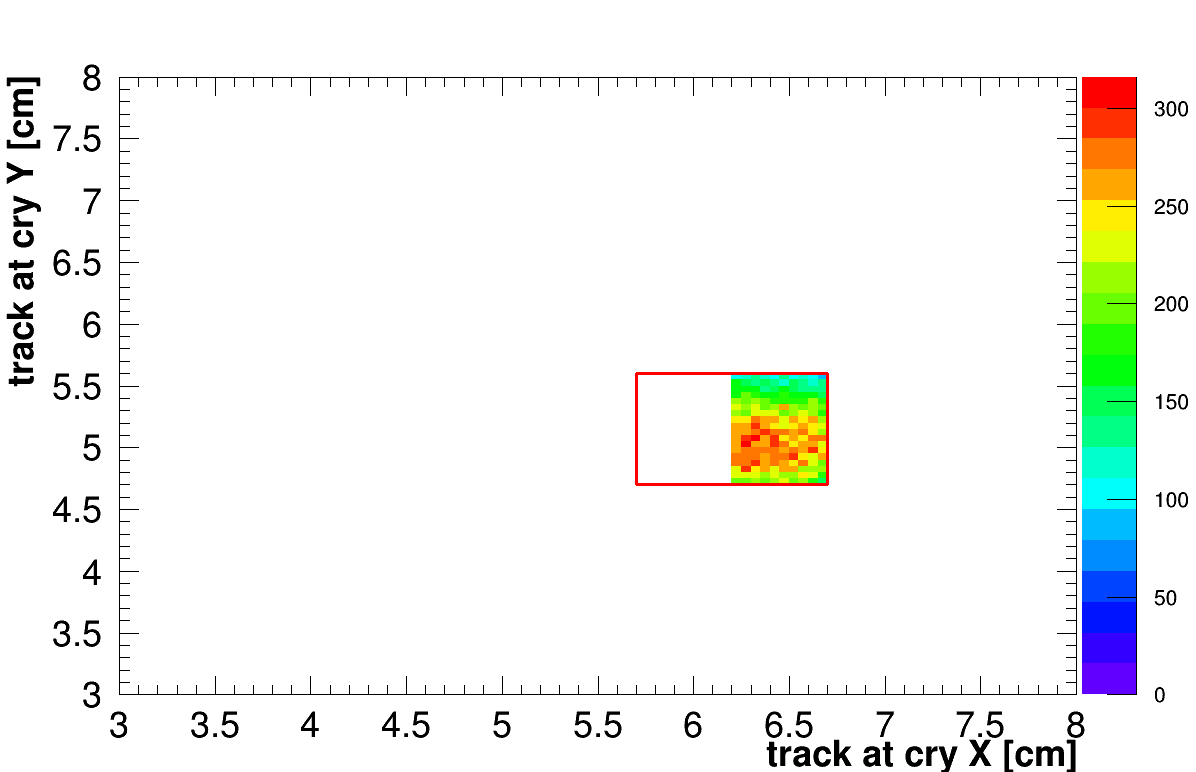

In [119]:
tre.Draw(F"cryPos[1]:cryPos[0]>>hh(100, 3, 8, 100, 3, 8)",  fidR , "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas()
cc.SetLogz(0)
hh.SetStats(0)
hh.SetTitle(run)
hh.GetXaxis().SetTitle("track at cry X [cm]")
hh.GetYaxis().SetTitle("track at cry Y [cm]")
box = TBox(fidlarge[0], fidlarge[2], fidlarge[1], fidlarge[3])
box.SetLineColor(kRed)
box.SetLineWidth(3)
box.SetFillStyle(0)
hh.Draw("zcol")
box.Draw("same")
cc.SaveAs(out + "fiducial" + exten) 

Info in <TCanvas::Print>: pdf file out/run530164/waveshape/fiducial.pdf has been created


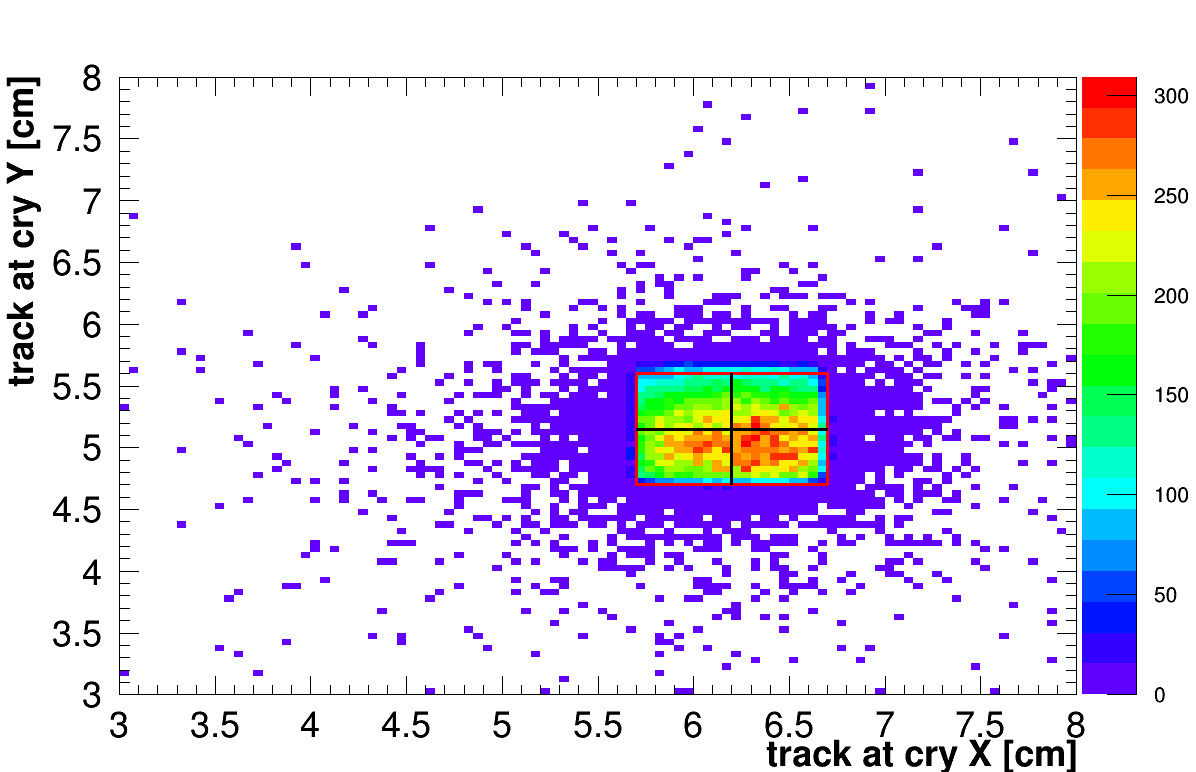

In [120]:
tre.Draw(F"cryPos[1]:cryPos[0]>>hh(100, 3, 8, 100, 3, 8)",  cCutSipm , "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas()
cc.SetLogz(0)
hh.SetStats(0)
hh.SetTitle(run)
hh.GetXaxis().SetTitle("track at cry X [cm]")
hh.GetYaxis().SetTitle("track at cry Y [cm]")
box = TBox(fidlarge[0], fidlarge[2], fidlarge[1], fidlarge[3])
box.SetLineColor(kRed)
box.SetLineWidth(3)
box.SetFillStyle(0)
l1, l2 = TLine(fidMidX, fidlarge[2], fidMidX, fidlarge[3]), TLine(fidlarge[0], fidMidY, fidlarge[1], fidMidY)
l1.SetLineWidth(3)
l2.SetLineWidth(3)
# l1.SetLineColor(kRed)
# l2.SetLineColor(kRed)
hh.Draw("zcol")
box.Draw("same")
l1.Draw("same")
l2.Draw("same")
cc.SaveAs(out + "fiducial" + exten) 

In [121]:
qmin, qmax = 120, 170 
qCut = F"charge[0] > {qmin} && charge[1] > {qmin} && charge[0] < {qmax} && charge[1] < {qmax}"

Info in <TCanvas::Print>: pdf file out/run530164/waveshape/all.pdf has been created


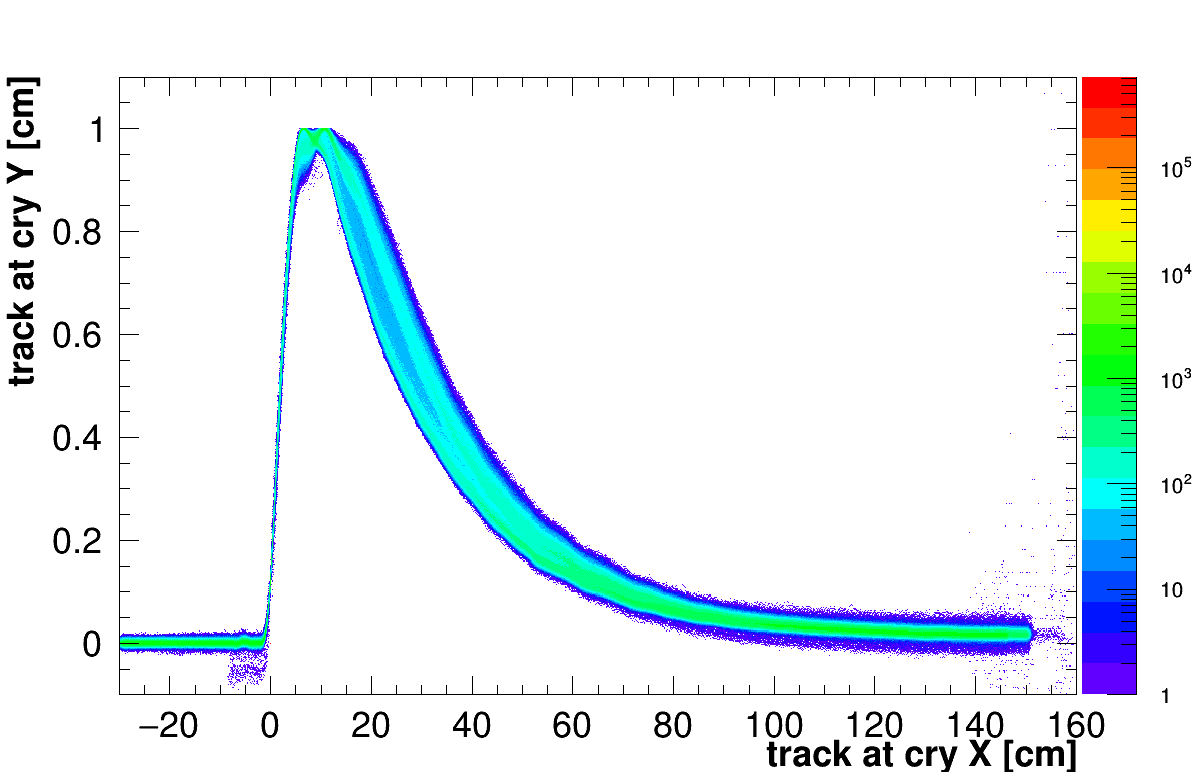

In [122]:
tre.Draw(F"waveNorm[0]:waveNormTime[0]>>hh{histoWave}", qCut + cutAnd + fidLarge, "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas()
cc.SetLogz(1)
hh.SetStats(0)
hh.SetTitle(run + " all waves")
hh.GetXaxis().SetTitle("track at cry X [cm]")
hh.GetYaxis().SetTitle("track at cry Y [cm]")
hh.Draw("zcol")

cc.SaveAs(out + "all" + exten) 

In [123]:
fuzzyQuadrants, fuzzySides, profQuadrants, profSides, splineQuadrants, splineSides = [], [], [], [], [], []

for i in tqdm(range(4)):
    tre.Draw(F"waveNorm[0]:waveNormTime[0]>>hhh{histoWave}", qCut + cutAnd + fidQuadrants[i], "zcol")
    fuzzyQuadrants.append(gDirectory.Get("hhh").Clone())
    profQuadrants.append(fuzzyQuadrants[i].ProfileX())
    splineQuadrants.append(TSpline5(profQuadrants[i]))

for i in tqdm(range(4)):
    tre.Draw(F"waveNorm[0]:waveNormTime[0]>>hhh{histoWave}", qCut + cutAnd + fidSides[i], "zcol")
    fuzzySides.append(gDirectory.Get("hhh").Clone())
    profSides.append(fuzzySides[i].ProfileX())
    splineSides.append(TSpline5(profSides[i]))


100%|██████████| 4/4 [00:55<00:00, 13.88s/it]
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hhh (Potential memory leak).


Info in <TCanvas::Print>: pdf file out/run530164/waveshape/fuzzyQuadrants.pdf has been created


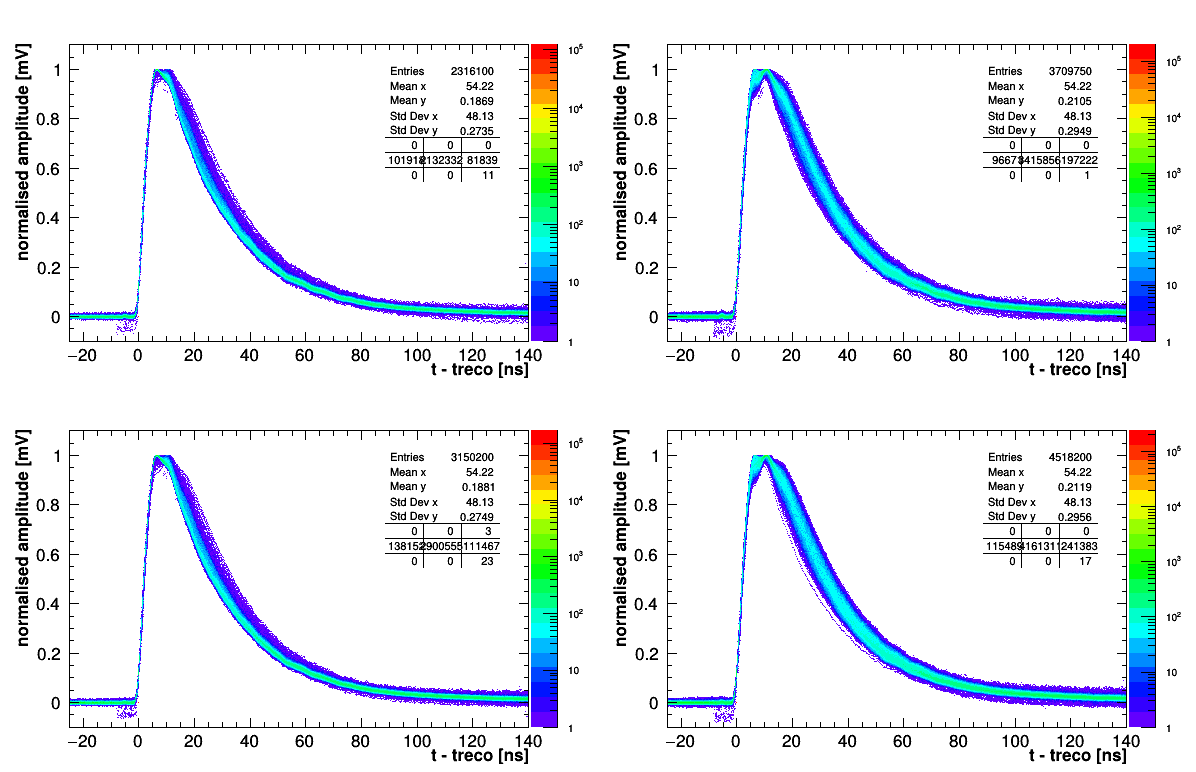

In [124]:
_, cc = NewCanvas()
cc.Divide(2,2)

for idx, thisHisto in enumerate(fuzzyQuadrants):
    cc.cd(idx+1)
    cc.SetLogz(1)
    gPad.SetLogz(1)
    thisHisto.GetXaxis().SetRangeUser(-25, 140)
    thisHisto.GetXaxis().SetTitle("t - treco [ns]")
    thisHisto.GetYaxis().SetTitle("normalised amplitude [mV]")
    thisHisto.DrawClone(F'zcol same')

cc.SaveAs(out + "fuzzyQuadrants" + exten)    

Info in <TCanvas::Print>: pdf file out/run530164/waveshape/fuzzyQuadrantsZoom.pdf has been created


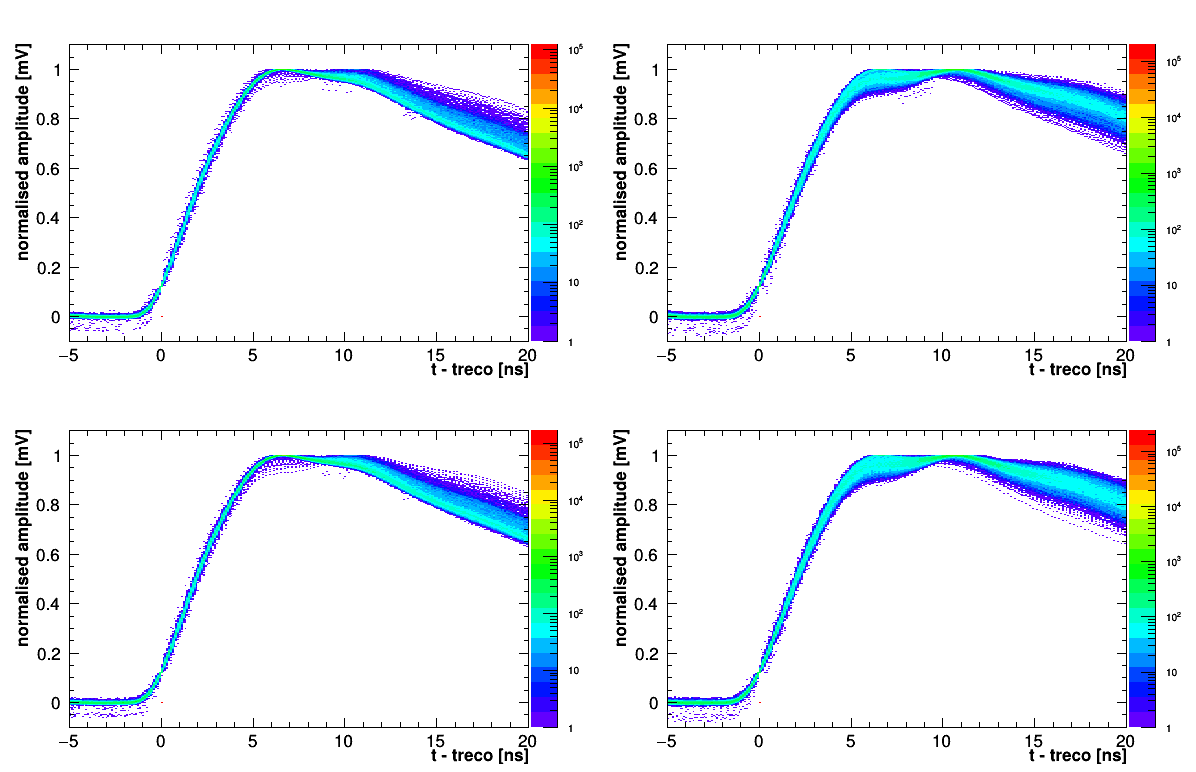

In [125]:
_, cc = NewCanvas()
cc.Divide(2,2)

for idx, thisHisto in enumerate(fuzzyQuadrants):
    cc.cd(idx+1)
    cc.SetLogz(1)
    gPad.SetLogz(1)
    thisHisto.SetStats(0)
    thisHisto.GetXaxis().SetRangeUser(-5, 20)
    thisHisto.GetXaxis().SetTitle("t - treco [ns]")
    thisHisto.GetYaxis().SetTitle("normalised amplitude [mV]")
    thisHisto.DrawClone(F'zcol same')

cc.SaveAs(out + "fuzzyQuadrantsZoom" + exten)    

Info in <TCanvas::Print>: pdf file out/run530164/waveshape/splineQuadrants.pdf has been created


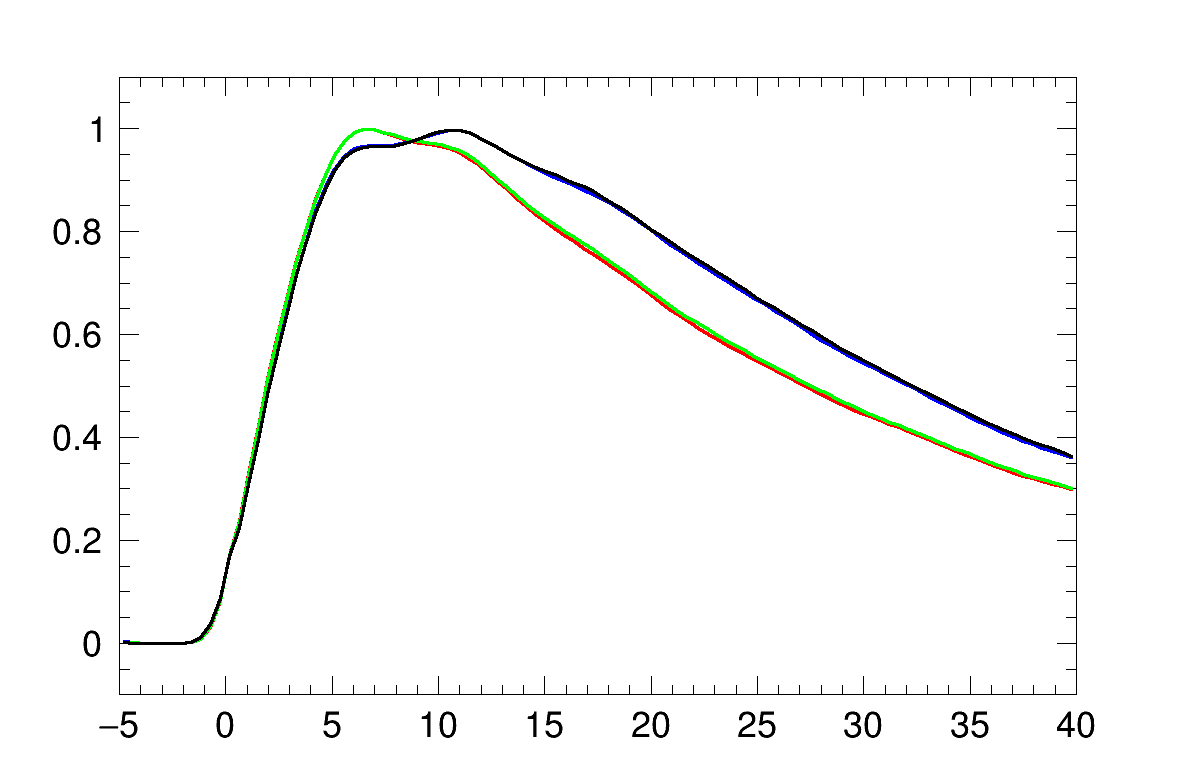

In [126]:
colors = [kRed, kBlue, kGreen, kBlack]
_, cc = NewCanvas()
cc.DrawFrame(-5, -0.1, 40, 1.1)

for idx, thisHisto in enumerate(splineQuadrants):
    thisHisto.SetLineColor(colors[idx]) 
    thisHisto.SetMarkerColor(colors[idx]) 
    thisHisto.SetLineWidth(3)
    thisHisto.DrawClone(F'L same')

cc.SaveAs(out + "splineQuadrants" + exten)    

Info in <TCanvas::Print>: pdf file out/run530164/waveshape/splineSides.pdf has been created


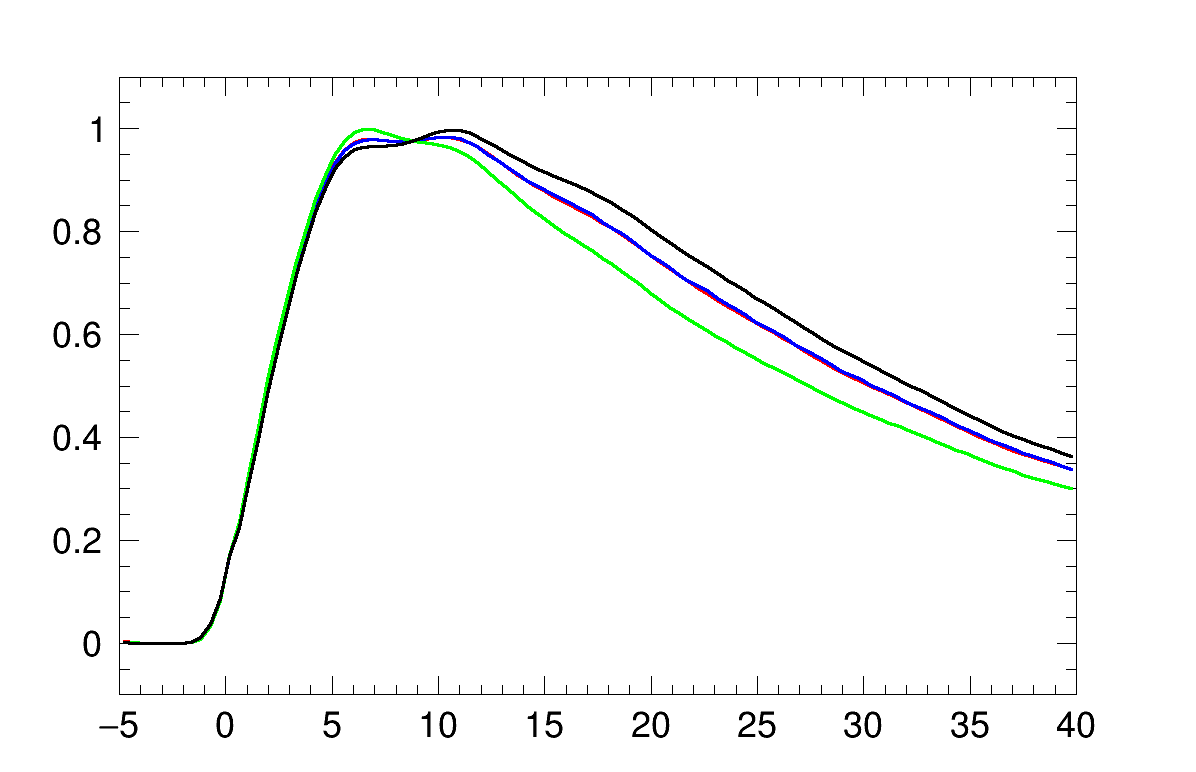

In [127]:
colors = [kRed, kBlue, kGreen, kBlack]
_, cc = NewCanvas()
cc.DrawFrame(-5, -0.1, 40, 1.1)

for idx, thisHisto in enumerate(splineSides):
    thisHisto.SetLineColor(colors[idx]) 
    thisHisto.SetMarkerColor(colors[idx]) 
    thisHisto.SetLineWidth(3)
    thisHisto.DrawClone(F'L same')

cc.SaveAs(out + "splineSides" + exten)    

Info in <TCanvas::Print>: pdf file out/run530164/waveshape/splineUD.pdf has been created


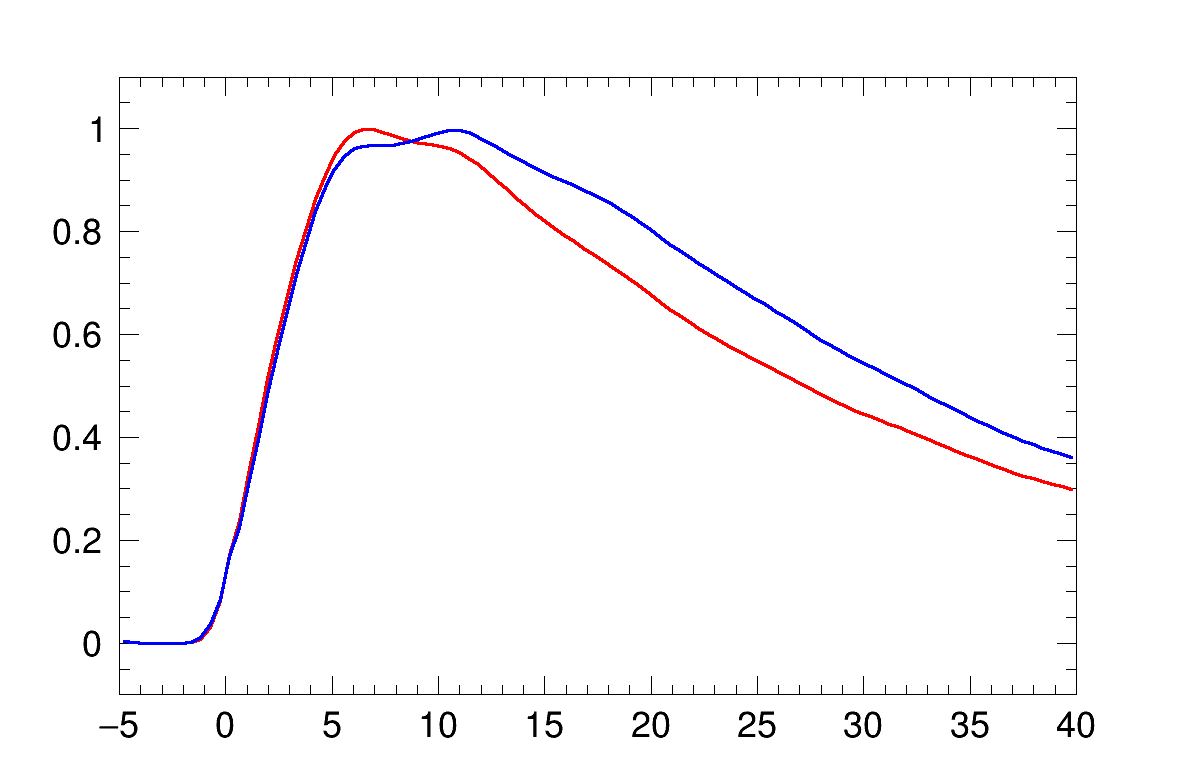

In [128]:
colors = [kRed, kBlue, kGreen, kBlack]
_, cc = NewCanvas()
cc.DrawFrame(-5, -0.1, 40, 1.1)

for idx in [0, 1]:
    thisHisto = splineQuadrants[idx]
    thisHisto.SetLineColor(colors[idx]) 
    thisHisto.SetMarkerColor(colors[idx]) 
    thisHisto.SetLineWidth(3)
    thisHisto.DrawClone(F'L same')

cc.SaveAs(out + "splineUD" + exten)    

Info in <TCanvas::Print>: pdf file out/run530164/waveshape/splineLR.pdf has been created


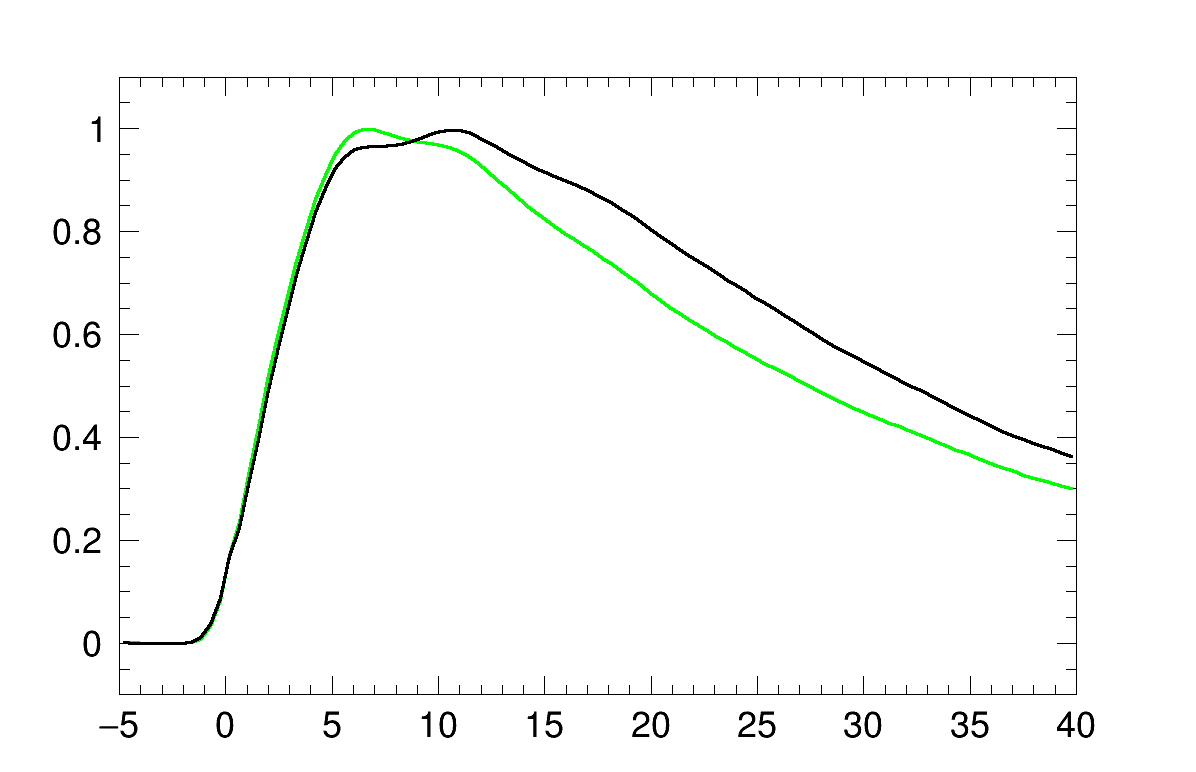

In [129]:
colors = [kRed, kBlue, kGreen, kBlack]
_, cc = NewCanvas()
cc.DrawFrame(-5, -0.1, 40, 1.1)

for idx in [2, 3]:
    thisHisto = splineSides[idx]
    thisHisto.SetLineColor(colors[idx]) 
    thisHisto.SetMarkerColor(colors[idx]) 
    thisHisto.SetLineWidth(3)
    thisHisto.DrawClone(F'L same')

cc.SaveAs(out + "splineLR" + exten)    